<a href="https://colab.research.google.com/github/MurtazAlek/MLDM-2021/blob/main/Murtazina_%22MLDM_2021_seminar07_homework%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please, fill in before you start:
First Name: **Aleksandra**

Last Name: **Murtazina**

Group:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

dataset = fetch_california_housing()

data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data['target'] = dataset.target

print(len(data))
data.head(10)

20640


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


This data contains 2 spacial features: `['Longitude', 'Latitude']`:

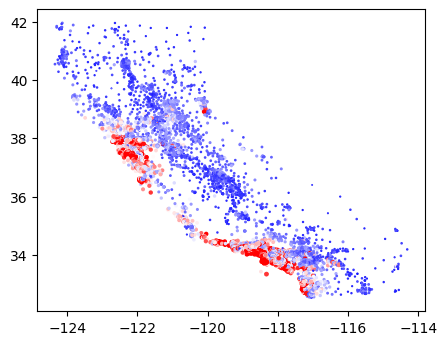

In [ ]:
plt.figure(figsize=(5, 4), dpi=100)
plt.scatter(data.Longitude, data.Latitude, s=data.target, c=data.target, cmap='bwr');

(Compare this plot with the map of California: https://en.wikipedia.org/wiki/California)

A kNN model might be quite reasonable to use on this 2D subspace.

Let's first divide our data into train and test:

In [ ]:
X, y = data.drop('target', axis=1), data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15480, 8) (5160, 8) (15480,) (5160,)


# Task 1 (6 points)

 - Build a kNN regressor on the `Longitude` and `Latitude` features (**1 point**)
 - Build a random forest regressor on the rest of the features (**1 point**)
 - Build a stacking regressor (`sklearn.ensemble.StackingRegressor`) with 5-fold cross-val-predict using the two models above as the base models and a linear regression model as the final (aggregating) estimator (**3 points**)
 - Compare the test MSE losses of the 3 models above (**1 point**)
 

Make sure to have a look at the documentation: 
https://scikit-learn.org/stable/modules/ensemble.html#stacking

You can make a pipeline (`sklearn.pipeline.make_pipeline`) with a `ColumnTransformer` (`sklearn.compose.make_column_transformer`) and a regression model (knn or random forest), where the `ColumnTransformer` will select the desired columns from the dataset (see the docs for the column transformer: https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html).

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

from sklearn.metrics import mean_squared_error

### **Task 1.1 (1 point)**

In [ ]:
mse_val_knn = {}
for k in range(50):
    k = k+1
    model = KNeighborsRegressor(n_neighbors = k)

    model.fit(X_train[['Longitude','Latitude']], y_train)
    pred=model.predict(X_test[['Longitude','Latitude']])
    error = (mean_squared_error(y_test,pred))
    mse_val_knn[k]=error
    
   

In [ ]:
array = np.array(list(mse_val_knn.items()), dtype=float)

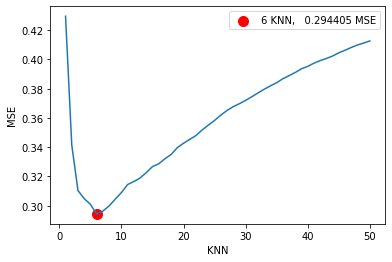

In [ ]:
plt.plot(array[:,0], array[:,1])
plt.scatter(min(mse_val_knn, key=mse_val_knn.get),mse_val_knn.get(min(mse_val_knn, key=mse_val_knn.get)),color='r',s=100 ,
            label='%d %s, %10f %s' % (min(mse_val_knn, key=mse_val_knn.get), 
                                      'KNN', mse_val_knn.get(min(mse_val_knn, key=mse_val_knn.get)), 'MSE'))
plt.legend()
plt.xlabel('KNN')
plt.ylabel('MSE')
plt.show()

### **Task 1.2 (1 point)**

In [ ]:
mse_val_RF = {}
for k in range(6):
    k = k+1
    model = RandomForestRegressor(n_estimators=10,criterion='mse', max_depth=None, min_samples_split=2,
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                  max_features=k, max_leaf_nodes=None,
                                  bootstrap=True, oob_score=False, n_jobs=-1,
                                  random_state=1233, verbose=0, warm_start=False)

    model.fit(X_train.drop(labels=(['Longitude','Latitude']),axis=1), y_train)
    pred=model.predict(X_test.drop(labels=(['Longitude','Latitude']),axis=1))
    error = (mean_squared_error(y_test,pred))
    mse_val_RF[k]=error


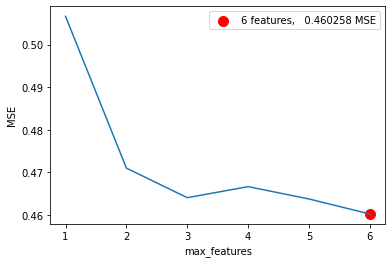

In [ ]:
array = np.array(list(mse_val_RF.items()), dtype=float)
plt.plot(array[:,0], array[:,1])
plt.scatter(min(mse_val_RF, key=mse_val_RF.get),mse_val_RF.get(min(mse_val_RF, key=mse_val_RF.get)),color='r',s=100 ,
            label='%d %s, %10f %s' % (min(mse_val_RF, key=mse_val_RF.get), 
                                      'features', mse_val_RF.get(min(mse_val_RF, key=mse_val_RF.get)), 'MSE'))
plt.legend()
plt.xlabel('max_features')
plt.ylabel('MSE')
plt.show()



### **Task 1.3 (3 point)**

In [ ]:
pipe_knn=Pipeline(steps=[('knn', KNeighborsRegressor(n_neighbors = 6))])
pipe_knn.fit(X_train[['Longitude','Latitude']],y_train)
# pred_knn=pipe_knn.predict(X_test[['Longitude','Latitude']])
# print((mean_squared_error(y_test,pred_knn)))

pipe_RF=Pipeline(steps=[('RF', RandomForestRegressor(n_estimators=10,criterion='mse', max_depth=None, min_samples_split=2,
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                  max_features=6, max_leaf_nodes=None,
                                  bootstrap=True, oob_score=False, n_jobs=-1,
                                  random_state=1233, verbose=0, warm_start=False))])
pipe_RF.fit(X_train.drop(labels=(['Longitude','Latitude']),axis=1), y_train)
# pred_RF=pipe_RF.predict((X_test.drop(labels=(['Longitude','Latitude']),axis=1)))
# print((mean_squared_error(y_test,pred_RF)))


model=StackingRegressor(estimators=[('knn',pipe_knn),('RF',pipe_RF)], final_estimator=LinearRegression(), cv=5)
model.fit(X_train, y_train)
min_mse_stacking=mean_squared_error(y_test,model.predict(X_test))

### **Task 1.4 (1 point)**

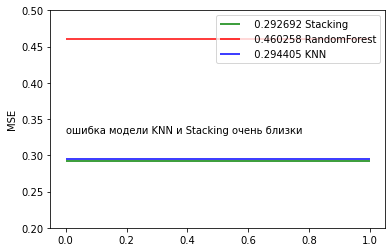

In [ ]:
plt.hlines(min_mse_stacking,xmin=0,xmax=1, color='green', 
           label='%10f %s' % (min_mse_stacking,'Stacking'))
plt.hlines(mse_val_RF.get(min(mse_val_RF, key=mse_val_RF.get)),xmin=0,xmax=1, color='red', 
           label='%10f %s' % (mse_val_RF.get(min(mse_val_RF, key=mse_val_RF.get)),'RandomForest'))
plt.hlines(mse_val_knn.get(min(mse_val_knn, key=mse_val_knn.get)),xmin=0,xmax=1,color='blue',
           label='%10f %s' % (mse_val_knn.get(min(mse_val_knn, key=mse_val_knn.get)),'KNN'))
plt.legend()
plt.ylabel("MSE")
plt.ylim(0.2,0.5)
plt.text(0,0.33, 'ошибка модели KNN и Stacking очень близки')
plt.show()